In [167]:
import pandas as pd

In [168]:
df = pd.read_csv('testing_data/titanic.csv')

In [169]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [170]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [171]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [172]:
import numpy
df["cabin_null"] = numpy.where(df['Cabin'].isnull(),1, 0) 

In [173]:
df['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [174]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

In [175]:
df = pd.read_csv('testing_data/titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [176]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [177]:
def impute_nan_median(df, variable, median):
	df[variable + '_median'] = df[variable].fillna(median)

def impute_nan_mode(df, variable, mode):
	df[variable+'_mode'] = df[variable].fillna(mode)

def impute_nan_mean(df, variable, mean):
	df[variable+'_mean'] = df[variable].fillna(mean)

In [178]:
median = df.Age.median()
median

28.0

In [179]:
mean = df.Age.mean()
mean

29.69911764705882

In [180]:
impute_nan_median(df, 'Age', median)
impute_nan_mean(df, 'Age', mean)
df.head()

,Survived,Age,Fare,Age_median,Age_mean
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [181]:
df['Age'].std()

14.526497332334042

In [182]:
df['Age_median'].std()

13.019696550973201

In [183]:
import matplotlib.pyplot as plt


In [184]:
mode = df['Age'].mode()[0]

impute_nan_mode(df, 'Age', mode)

df.head()


,Survived,Age,Fare,Age_median,Age_mean,Age_mode
0,0,22.0,7.2500,22.0,22.0,22.0
1,1,38.0,71.2833,38.0,38.0,38.0
2,1,26.0,7.9250,26.0,26.0,26.0
3,1,35.0,53.1000,35.0,35.0,35.0
4,0,35.0,8.0500,35.0,35.0,35.0


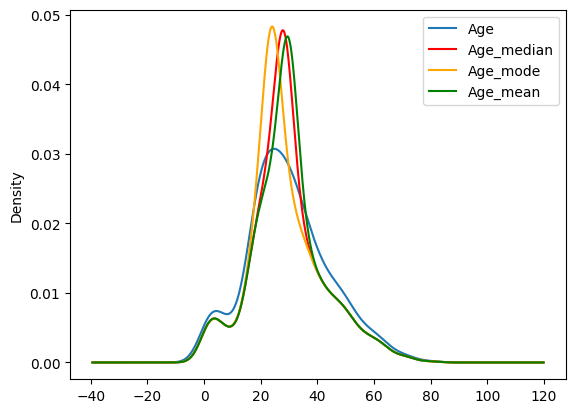

In [185]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
# KDE - kernel density estimation
df['Age'].plot(kind='kde', ax=ax)
df['Age_median'].plot(kind='kde', ax = ax, color='red')
df['Age_mode'].plot(kind='kde', ax = ax, color='orange')
df['Age_mean'].plot(kind='kde', ax = ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')


In [186]:
df['Age_mode']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: Age_mode, Length: 891, dtype: float64